In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mydata=pd.read_csv('/content/churn_data.csv')

In [ ]:
mydata.head()

,Age,Default,Balance,Housing Loan,Personal Loan,Current Campaign,Married,Single,Churn
0,56,1,36515,1,0,0,0,0,1
1,69,0,87144,0,1,0,0,0,1
2,46,1,25898,0,1,0,0,0,1
3,32,0,-81,0,0,1,1,0,0
4,60,0,48070,1,0,0,1,0,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
df=mydata

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# prompt: scale age and balance

# Identify numerical columns to scale
numerical_cols = ['Age', 'Balance']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

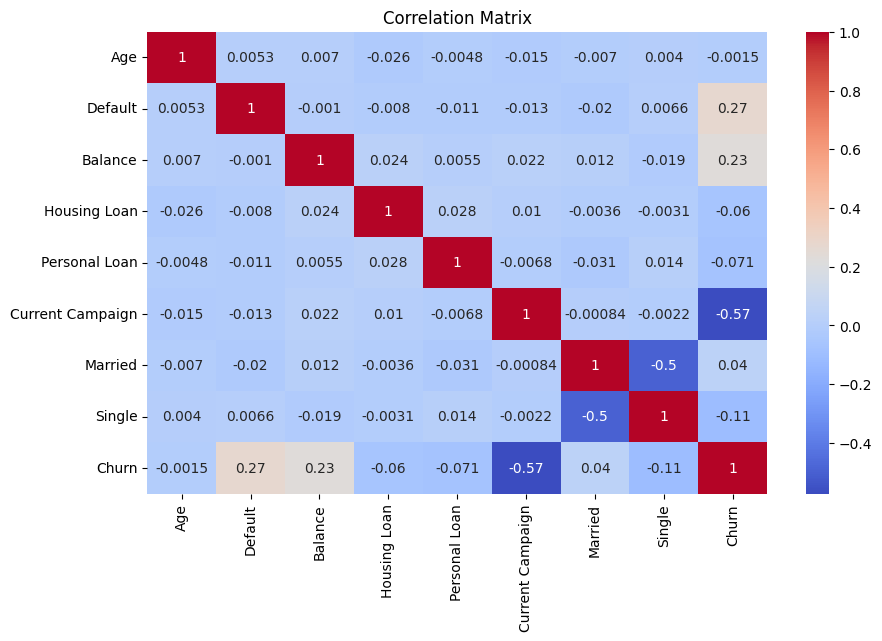

In [ ]:
# Data Visualization
# Visualizing the relationship between features and churn
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

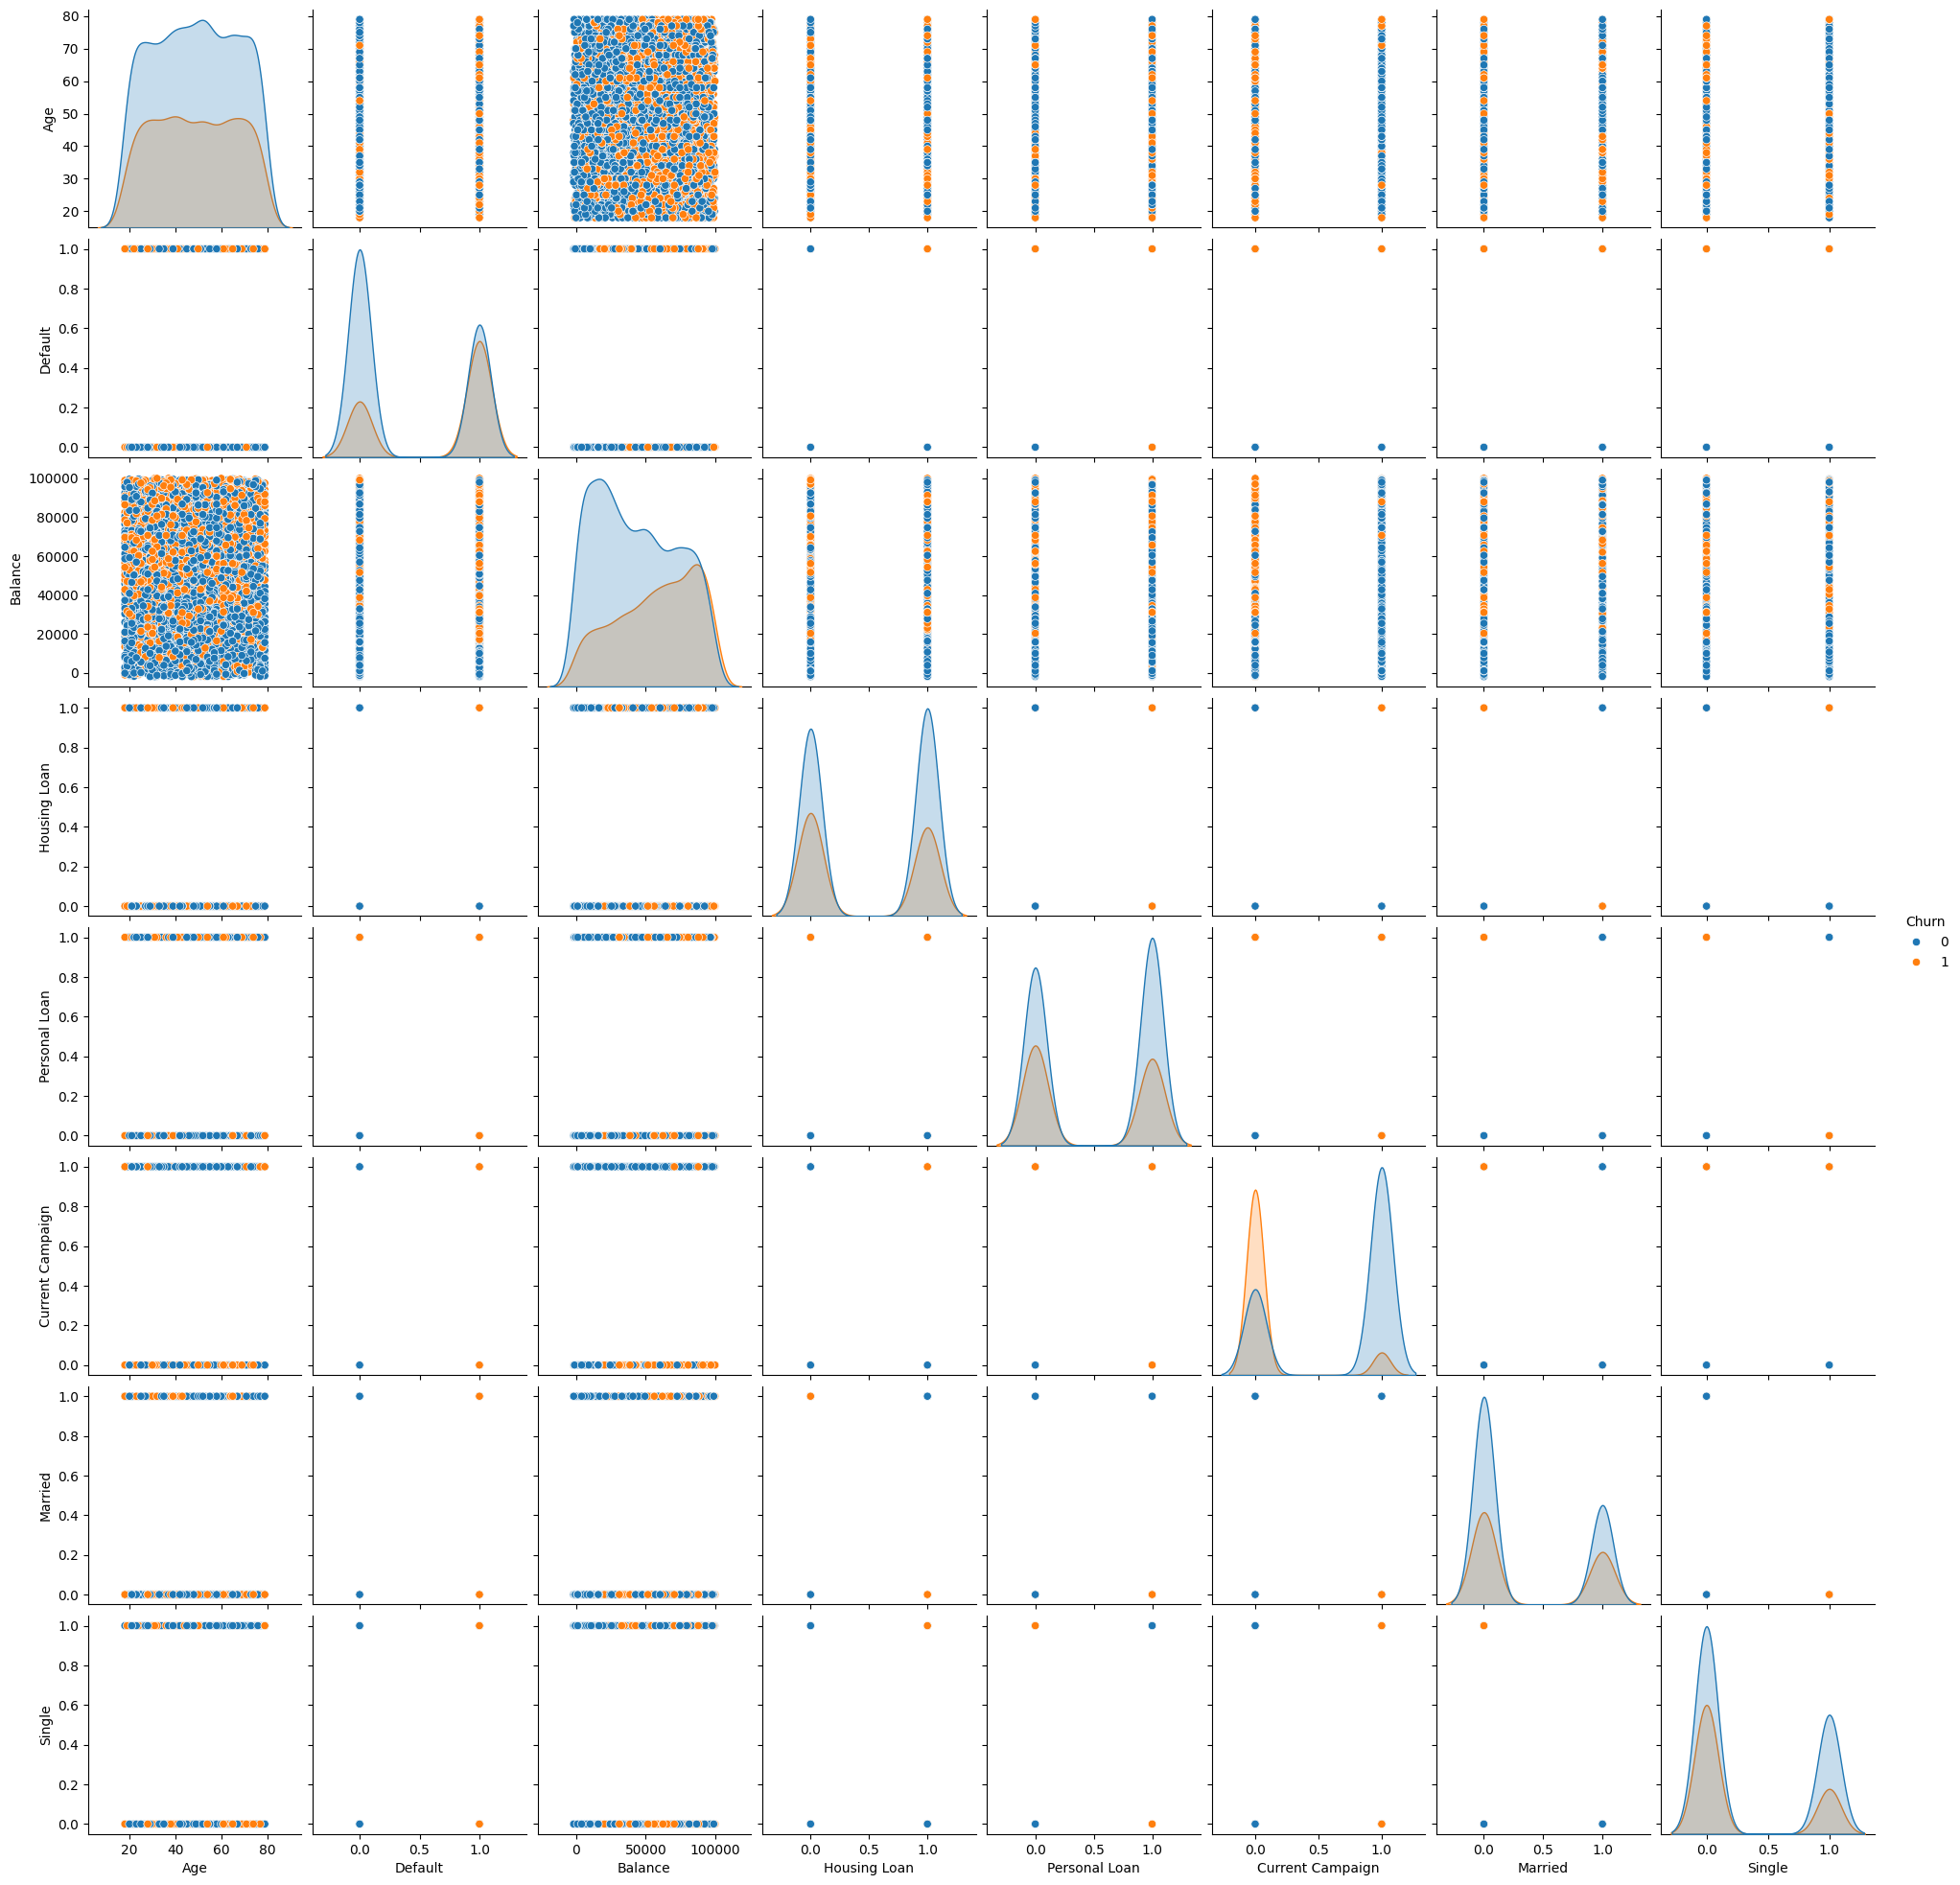

In [ ]:
# prompt: generate  pairplot with hue churn

# Assuming 'df' is your DataFrame with the 'Churn' column
sns.pairplot(df, hue='Churn')
plt.show()

Accuracy: 0.8536285362853628
Confusion Matrix:
[[945  97]
 [141 443]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1042
           1       0.82      0.76      0.79       584

    accuracy                           0.85      1626
   macro avg       0.85      0.83      0.84      1626
weighted avg       0.85      0.85      0.85      1626

ROC AUC Score: 0.933319419977388


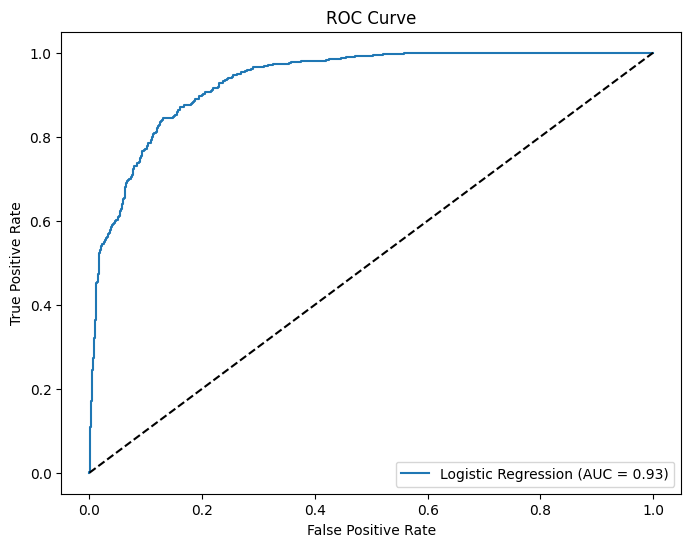

In [ ]:
# prompt: create logistic regression to predict y using x

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Calculate ROC AUC score
y_prob = logreg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# prompt: show the logistic regression result for each feature

# Get feature coefficients from the trained logistic regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients to see the most impactful features
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

feature_importance

,Feature,Coefficient
5,Current Campaign,-3.976989
1,Default,2.176865
2,Balance,1.012595
7,Single,-0.938241
4,Personal Loan,-0.598806
3,Housing Loan,-0.399621
0,Age,-0.053078
6,Married,-0.001424


In [ ]:
# prompt: which is most important feature for predicting churn

# Based on the provided code, the most important features for predicting churn are those
# with the highest absolute coefficient values in the logistic regression model.

# The code already calculates and displays these feature importances:
# feature_importance

# To get the most important feature, you can access the top row of this DataFrame
most_important_feature = feature_importance.iloc[0]['Feature']
print(f"The most important feature for predicting churn is: {most_important_feature}")

The most important feature for predicting churn is: Current Campaign


In [ ]:
# prompt: pivot table for each feature in x

# Assuming 'X' is your DataFrame of features
for col in X.columns:
  pivot_table = pd.pivot_table(df, values='Churn', index=col, aggfunc='mean')
  print(f"Pivot Table for {col}:\n{pivot_table}\n")

Pivot Table for Age:
        Churn
Age          
18   0.358025
19   0.295455
20   0.282353
21   0.393258
22   0.361446
..        ...
75   0.393258
76   0.376471
77   0.247706
78   0.435897
79   0.320000

[62 rows x 1 columns]

Pivot Table for Default:
            Churn
Default          
0        0.225000
1        0.486842

Pivot Table for Balance:
         Churn
Balance       
-1995      0.0
-1985      1.0
-1980      0.0
-1978      1.0
-1974      1.0
...        ...
 99771     1.0
 99967     1.0
 99971     1.0
 99978     1.0
 99982     1.0

[5268 rows x 1 columns]

Pivot Table for Housing Loan:
                 Churn
Housing Loan          
0             0.382615
1             0.324780

Pivot Table for Personal Loan:
                  Churn
Personal Loan          
0              0.388195
1              0.320490

Pivot Table for Current Campaign:
                     Churn
Current Campaign          
0                 0.625183
1                 0.077381

Pivot Table for Married:
          

In [ ]:
X_train.head()

,Age,Default,Balance,Housing Loan,Personal Loan,Current Campaign,Married,Single
579,0.180978,0,-1.334228,0,0,0,0,1
4190,1.413903,0,0.810110,1,1,0,0,1
4552,-1.220072,0,1.238183,0,0,0,0,0
5193,1.189735,1,1.269224,0,1,1,1,0
1684,1.582029,0,0.088900,1,0,1,0,0


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train contains the sample data you've provided

# Convert the boolean columns to integers (True -> 1, False -> 0)
X_train = X_train.astype(int)

# Add a constant (intercept) to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train_sm).fit()

# Print the summary of the model
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.357667
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3794
Model:                          Logit   Df Residuals:                     3785
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                  0.4481
Time:                        07:56:55   Log-Likelihood:                -1357.0
converged:                       True   LL-Null:                       -2458.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4221      0.123      3.445      0.001       0.182       0.662
Age        

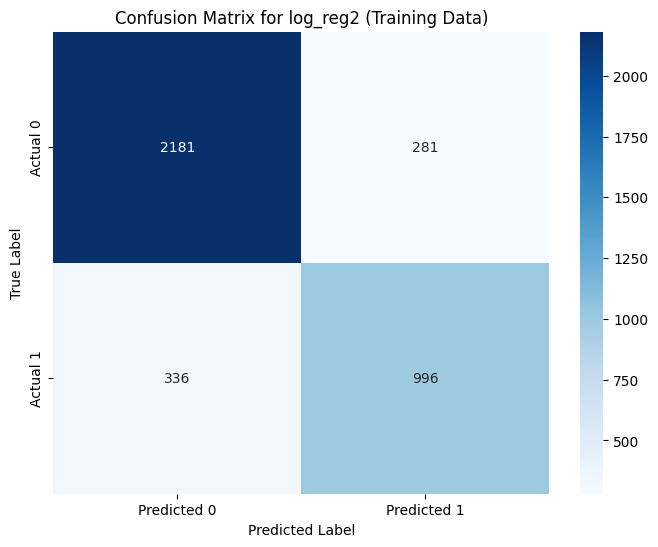

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the target variable for the training data using log_reg2
y_pred_train = log_reg.predict(X_train_sm)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred_train_class = (y_pred_train > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_class)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for log_reg2 (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Optimal Threshold: 0.55
Optimal Accuracy: 0.8403


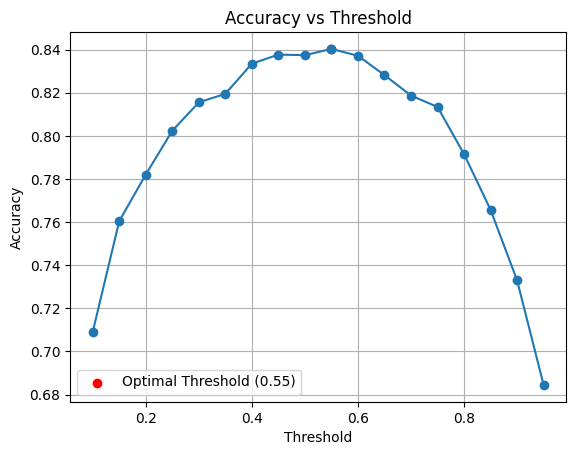

In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities for the training data
y_pred_prob = log_reg.predict(X_train_sm)

# Test different thresholds
thresholds = np.arange(0.1, 1, 0.05)
accuracy_scores = []

for threshold in thresholds:
    y_pred_class = (y_pred_prob > threshold).astype(int)
    accuracy = accuracy_score(y_train, y_pred_class)
    accuracy_scores.append(accuracy)

# Find the optimal threshold that maximizes accuracy
optimal_threshold = thresholds[np.argmax(accuracy_scores)]
optimal_accuracy = np.max(accuracy_scores)

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Optimal Accuracy: {optimal_accuracy:.4f}")


# Plot accuracy vs threshold
plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Threshold")
plt.scatter(optimal_threshold, optimal_accuracy, color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.legend()
plt.grid(True)
plt.show()

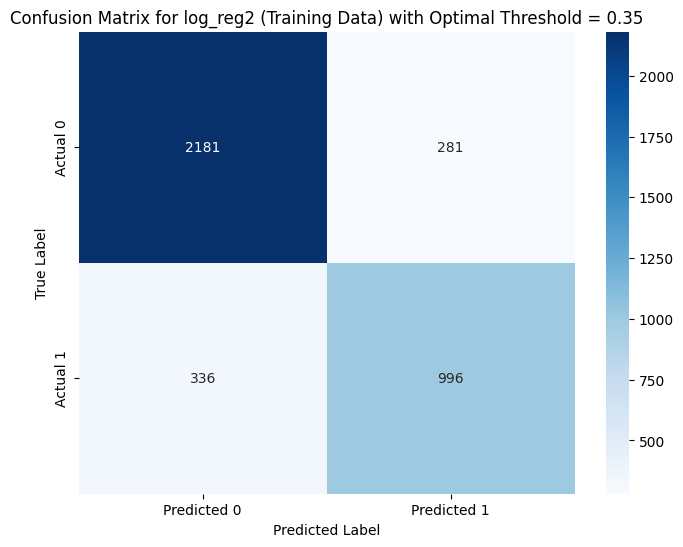

In [ ]:
# Predict probabilities for the training data using the optimal threshold (0.5)
y_pred_prob = log_reg.predict(X_train_sm)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_class)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for log_reg2 (Training Data) with Optimal Threshold = 0.35')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict probabilities for the training data using the optimal threshold (0.32)
y_pred_prob = log_reg.predict(X_train_sm)
y_pred_class = (y_pred_prob > 0.30).astype(int)

# Calculate the model parameters
accuracy = accuracy_score(y_train, y_pred_class)
recall = recall_score(y_train, y_pred_class)
precision = precision_score(y_train, y_pred_class)
f1 = f1_score(y_train, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8155
Recall: 0.8701
Precision: 0.6874
F1 Score: 0.7681


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train contains the sample data you've provided

# Convert the boolean columns to integers (True -> 1, False -> 0)
X_train = X_train.astype(int)

# Add a constant (intercept) to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train_sm).fit()

# Print the summary of the model
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.357667
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3794
Model:                          Logit   Df Residuals:                     3785
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                  0.4481
Time:                        07:56:56   Log-Likelihood:                -1357.0
converged:                       True   LL-Null:                       -2458.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4221      0.123      3.445      0.001       0.182       0.662
Age        

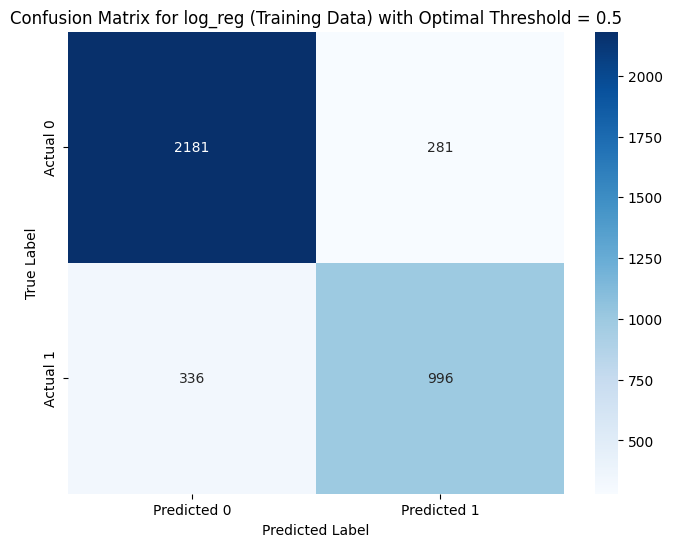

In [ ]:
# prompt: create confusion matrix of above model

# Predict probabilities for the test data using the optimal threshold (0.5)
y_pred_prob = log_reg.predict(X_train_sm)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_class)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for log_reg (Training Data) with Optimal Threshold = 0.5')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# prompt: check Accuracy
# Precision
# F1 Score:

# Predict probabilities for the test data using the trained model
y_pred_prob = log_reg.predict(sm.add_constant(X_test.astype(int)))
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Use a threshold of 0.5

# Calculate the model parameters for the test set
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8530
Recall: 0.7671
Precision: 0.8131
F1 Score: 0.7894


In [ ]:
# prompt: unscale age and balance

# Inverse transform the scaled 'Age' and 'Balance' columns
X[numerical_cols] = scaler.inverse_transform(X[numerical_cols])

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train contains the sample data you've provided

# Convert the boolean columns to integers (True -> 1, False -> 0)
X_train = X_train.astype(int)

# Add a constant (intercept) to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train_sm).fit()

# Print the summary of the model
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.357667
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3794
Model:                          Logit   Df Residuals:                     3785
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                  0.4481
Time:                        07:56:57   Log-Likelihood:                -1357.0
converged:                       True   LL-Null:                       -2458.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4221      0.123      3.445      0.001       0.182       0.662
Age        

In [ ]:
# prompt: predict for log_reg using x test , y test data

# Predict probabilities for the test data using the trained model
y_pred_prob = log_reg.predict(sm.add_constant(X_test.astype(int)))
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Use a threshold of 0.5

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8530135301353013
Confusion Matrix:
[[939 103]
 [136 448]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1042
           1       0.81      0.77      0.79       584

    accuracy                           0.85      1626
   macro avg       0.84      0.83      0.84      1626
weighted avg       0.85      0.85      0.85      1626



In [ ]:
y_pred_class # model is pass since train and test both are similar and over 80% accuracy

,0
4417,0
1538,1
315,0
297,0
4946,1
...,...
1650,0
2245,0
2072,0
5018,0


In [ ]:
# prompt: deploy above model for inputing x values to predict y

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Load your data (replace 'churn_data.csv' with your actual file)
mydata = pd.read_csv('/content/churn_data.csv')

# Preprocessing (same as your original code)
df = mydata
X = df.drop('Churn', axis=1)
y = df['Churn']
numerical_cols = ['Age', 'Balance']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model (using statsmodels as in your code)
X_train = X_train.astype(int)
X_train_sm = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train_sm).fit()


def predict_churn(input_data):
    """Predicts churn based on input features.

    Args:
        input_data: A dictionary where keys are feature names and values are the feature values.

    Returns:
        A dictionary containing the prediction probability and class label.
    """

    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Preprocess the input data (match training data preprocessing)
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df = input_df.astype(int)
    input_df_sm = sm.add_constant(input_df)

    # Make predictions
    prediction_prob = log_reg.predict(input_df_sm)[0]
    prediction_class = (prediction_prob > 0.5).astype(int)[0] # Using 0.5 as threshold

    return {"probability": prediction_prob, "class": prediction_class}

# Example usage:
input_data = { #replace with your values and features
    'Age': 35,
    'Balance': 1000,
    # ... other features ...
    }

result = predict_churn(input_data)
result

Optimization terminated successfully.
         Current function value: 0.357667
         Iterations 7


ValueError: shapes (1,2) and (9,) not aligned: 2 (dim 1) != 9 (dim 0)